In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

from sklearn.decomposition import PCA,SparsePCA,IncrementalPCA,TruncatedSVD,FastICA,MiniBatchSparsePCA,FactorAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("Electrical Grid.csv")

data_x = data.drop(['stab','stabf'],axis=1)
data_y = data['stab']

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(data_x)
scaled_x = pd.DataFrame(scaled_x, columns=data_x.columns)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


300
500
700
900
[0.011880836564015203, 0.01186904985071705, 0.011859704211804007, 0.01187306681759934]


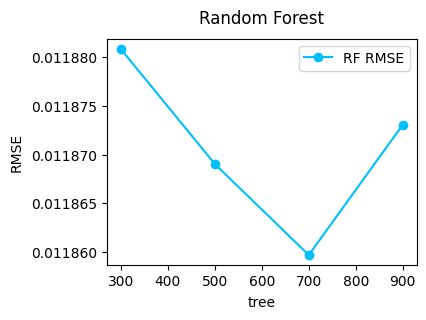

In [ ]:
RMSE_set_rf_depth = []
import matplotlib.pyplot as plt

trees = [300,500,700,900]

for tree in trees:
    print(tree)
    RMSE_set_rf ,mape_set_rf= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']
        rf_pred = RandomForestRegressor(n_estimators=tree,max_depth=20,max_samples=0.7,n_jobs=-1,max_features='auto').fit(train_x,train_y).predict(valid_x)
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,rf_pred)))

    RMSE_set_rf_depth.append( np.mean(RMSE_set_rf) )

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(trees,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="RF RMSE")
plt.title("Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("tree", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

0.5
0.7
0.9
[0.012011908748450154, 0.011865883249456182, 0.01179387551147204]


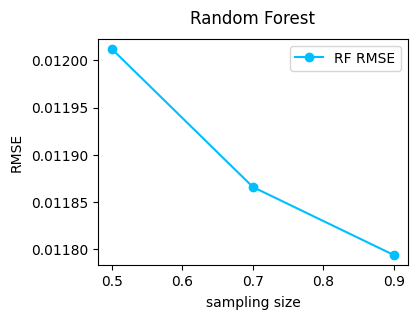

In [ ]:
RMSE_set_rf_depth = []
import matplotlib.pyplot as plt

sampling_sizes = [0.5,0.7,0.9]

for sampling_size in sampling_sizes:
    print(sampling_size)
    RMSE_set_rf ,mape_set_rf= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']
        rf_pred = RandomForestRegressor(n_estimators=700,max_depth=20,max_samples=sampling_size,n_jobs=-1,max_features='auto').fit(train_x,train_y).predict(valid_x)
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,rf_pred)))

    RMSE_set_rf_depth.append( np.mean(RMSE_set_rf) )

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(sampling_sizes,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="RF RMSE")
plt.title("Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("sampling size", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

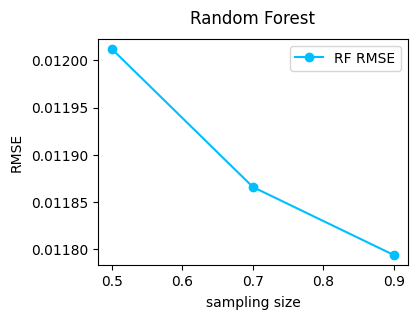

In [ ]:
import matplotlib.pyplot as plt

RMSE_set_rf_depth = [0.012011908748450154, 0.011865883249456182, 0.01179387551147204]
sampling_sizes = [0.5,0.7,0.9]

plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(sampling_sizes,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="RF RMSE")
plt.title("Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("bootstrap size", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

10
20
30
40
50
[0.012735521656426326, 0.011783308263005611, 0.011766738115272447, 0.011758841117290572, 0.011761898444081926]


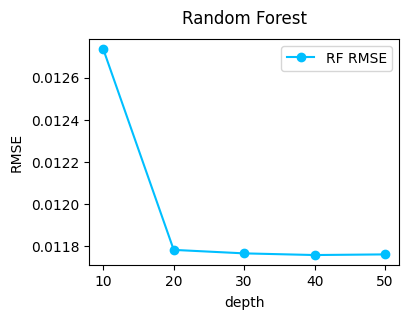

In [ ]:
RMSE_set_rf_depth = []
import matplotlib.pyplot as plt

depths = [10,20,30,40,50]

for depth in depths:
    print(depth)
    RMSE_set_rf ,mape_set_rf= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']
        rf_pred = RandomForestRegressor(n_estimators=700,max_depth=depth,max_samples=0.9,n_jobs=-1,max_features='auto').fit(train_x,train_y).predict(valid_x)
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,rf_pred)))

    RMSE_set_rf_depth.append( np.mean(RMSE_set_rf) )

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(depths,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="RF RMSE")
plt.title("Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("depth", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

4
6
8
10
12
[0.012332258717649404, 0.011910974536386877, 0.0118047646433543, 0.011793914759783749, 0.011772261831470251]


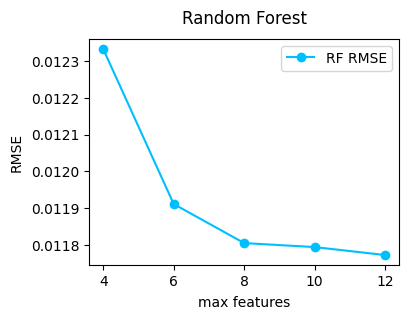

In [ ]:
RMSE_set_rf_depth = []
import matplotlib.pyplot as plt

features = [4,6,8,10,12]

for feature in features:
    print(feature)
    RMSE_set_rf ,mape_set_rf= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']
        rf_pred = RandomForestRegressor(n_estimators=700,max_depth=40,max_samples=0.9,n_jobs=-1,max_features=feature).fit(train_x,train_y).predict(valid_x)
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,rf_pred)))

    RMSE_set_rf_depth.append( np.mean(RMSE_set_rf) )

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(features,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="RF RMSE")
plt.title("Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("max features", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cnt = 1
RMSE_set_srf ,RMSE_set_twrf= [],[]
for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
    print('fold',cnt)
    train_x = scaled_x.iloc[train_index,:]
    train_y = data.iloc[train_index,:]['stab']
    valid_x = scaled_x.iloc[valid_index,:]
    valid_y = data.iloc[valid_index,:]['stab']

    rf_pred = RandomForestRegressor(n_estimators=700,max_depth=40,max_samples=0.9,n_jobs=-1,max_features=12).fit(train_x,train_y).predict(valid_x)
    RMSE_set_srf.append( np.sqrt( mean_squared_error(valid_y,rf_pred)))
    cnt+=1

print("rf",RMSE_set_srf)
print("mean",np.mean(RMSE_set_srf))

fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
rf [0.01200866032644281, 0.011780653514307926, 0.01183572465416156, 0.01133448388798133, 0.011222829193911574, 0.011531144648501704, 0.011014487586950878, 0.011365508986605355, 0.011295373384062952, 0.012489771342317036]
mean 0.011587863752524312
